In [83]:
import numpy as np
import seaborn as sns

In [71]:
N = 10
mus = np.random.random(size=N) * 50 + 50
sigmas = np.random.random(size=N)
n_i = np.random.randint(1, 100, size=N)
samples = [np.random.normal(mus[i], sigmas[i], size=n_i[i]) for i in range(N)]
mus, sigmas, n_i

(array([61.2482725 , 60.55715807, 85.66155158, 89.03093016, 76.07761668,
        93.86485052, 69.59065104, 68.84422938, 81.66186803, 90.0442083 ]),
 array([0.40066378, 0.23587474, 0.94070764, 0.53379334, 0.26228516,
        0.43357144, 0.77159093, 0.06278571, 0.22750503, 0.92141557]),
 array([13, 75, 26, 36, 69, 58, 29, 69,  4, 75]))

In [86]:
local_mse = (sigmas ** 2 / n_i)
local_mse

array([1.23485744e-02, 7.41825251e-04, 3.40358023e-02, 7.91487031e-03,
       9.97007313e-04, 3.24110682e-03, 2.05293986e-02, 5.71310908e-05,
       1.29396346e-02, 1.13200887e-02])

In [73]:
big_E = (mus ** 2 / (sigmas ** 2 / n_i)).sum() + 1
emse = mus ** 2 / big_E
emse

array([3.77345586e-05, 3.68877833e-05, 7.38114028e-05, 7.97321377e-05,
       5.82190862e-05, 8.86252702e-05, 4.87139544e-05, 4.76745577e-05,
       6.70795603e-05, 8.15573591e-05])

In [74]:
C = mus.reshape((N, 1)) @ mus.reshape((N, 1)).T
W = C @ np.linalg.inv(C + np.eye(N) * (sigmas ** 2 / n_i))

P_SM = np.array([np.mean(samples[i]).item() for i in range(N)])
mse = ((W * P_SM).sum(axis=1) - mus) ** 2
mse

array([5.83451672e-07, 5.70213697e-07, 1.14072533e-06, 1.23218189e-06,
       8.99818716e-07, 1.36948276e-06, 7.52891701e-07, 7.36874835e-07,
       1.03696999e-06, 1.26050150e-06])

In [76]:
contribution = (np.abs(W.T) - np.abs(W)).sum(axis=1)
contribution

array([-0.84122015, -0.23235635, -1.21105497, -1.19125469, -0.49695128,
       -1.12234455, -0.97334192,  8.42402163, -1.12395227, -1.23154546])

In [92]:
C_vec = -contribution
C_vec -= C_vec.min()
C_vec /= C_vec.max()
C_vec

array([0.9595751 , 0.89651679, 0.99787786, 0.9958272 , 0.92392014,
       0.98869037, 0.97325858, 0.        , 0.98885688, 1.        ])

In [101]:
min_contr = np.argmax(C_vec)
scale = 1 - (mse[min_contr].item() * (n_i[min_contr].item() / sigmas[min_contr].item() ** 2)) - 0.001
scale

0.9988886491497156

In [102]:
pen = (C_vec * scale) * (sigmas ** 2 / n_i)
pen

array([0.01183622, 0.00066432, 0.03392583, 0.00787308, 0.00092013,
       0.00320089, 0.01995821, 0.        , 0.01278123, 0.01130751])

In [103]:
emse_pen = mus ** 2 / big_E + pen
emse_pen

array([1.18739503e-02, 7.01207460e-04, 3.39996395e-02, 7.95281576e-03,
       9.78350497e-04, 3.28951510e-03, 2.00069221e-02, 4.76745577e-05,
       1.28483060e-02, 1.13890655e-02])

In [104]:
utility = lambda x: -x

gain = utility(emse_pen) - utility(local_mse)
gain

array([ 4.74624113e-04,  4.06177914e-05,  3.61628518e-05, -3.79454561e-05,
        1.86568158e-05, -4.84082746e-05,  5.22476493e-04,  9.45653307e-06,
        9.13286356e-05, -6.89767689e-05])

<Axes: >

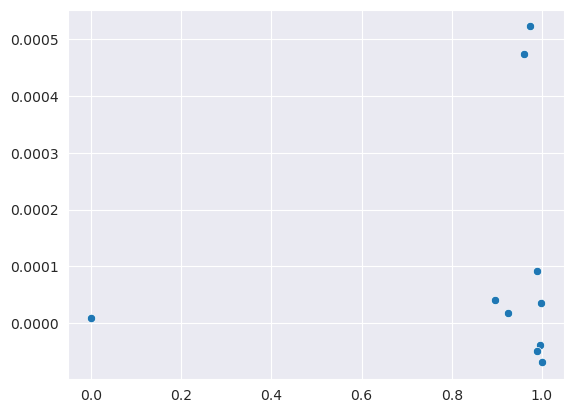

In [105]:
x, y = C_vec, gain
sns.scatterplot(x=x, y=y)